### Top Five Exporters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imf_trade_data = pd.read_csv("imf_trade_dataset.csv")

In [3]:
imf_trade_data.head()

,COUNTRY,INDICATOR,TYPE_OF_TRANSFORMATION,FREQUENCY,TIME_PERIOD,OBS_VALUE,SCALE
0,Romania,Exports of goods,"Free on board (FOB), US dollar",Annual,2016.0,6.353400e+10,Millions
1,Romania,Exports of goods,"Free on board (FOB), US dollar",Annual,2017.0,7.076300e+10,Millions
2,Romania,Exports of goods,"Free on board (FOB), US dollar",Annual,2018.0,7.966100e+10,Millions
3,Romania,Exports of goods,"Free on board (FOB), US dollar",Annual,2019.0,7.687200e+10,Millions
4,Romania,Exports of goods,"Free on board (FOB), US dollar",Annual,2020.0,7.071800e+10,Millions


In [4]:
imf_trade_data["TIME_PERIOD"] = imf_trade_data["TIME_PERIOD"].astype("object")

In [5]:
imf_trade_data = imf_trade_data[imf_trade_data["INDICATOR"] == "Exports of goods"]

In [6]:
imf_trade_data["INDICATOR"].nunique()

1

In [8]:
China_2016 = (imf_trade_data[(imf_trade_data["COUNTRY"] == "China, People's Republic of") & (imf_trade_data["TIME_PERIOD"].isin([2016]))]
              )

China_2023 = (imf_trade_data[(imf_trade_data["COUNTRY"] == "China, People's Republic of") & (imf_trade_data["TIME_PERIOD"].isin([2023]))])
              
#colour = ["#FFFF00","#000000" "#0A3161",  , "#BC002D"]


top5_exporters = (imf_trade_data
 .pivot_table(index = "COUNTRY", values = "OBS_VALUE", aggfunc="sum")
 .nlargest(columns="OBS_VALUE", n = 5)
 )


top5_stackplot = (imf_trade_data[imf_trade_data["COUNTRY"].isin(["China, People's Republic of",
                                               "Germany", "Netherlands, The", 
                                               "United States",
                                                "Japan"])]
                                                .pivot_table(index = "TIME_PERIOD", 
                                                             columns="COUNTRY", 
                                                             values= "OBS_VALUE",
                                                             aggfunc="sum")
                                )

top5_side_by_side_barchart = (imf_trade_data
                              [(imf_trade_data["TIME_PERIOD"].isin([2016, 2023])) &
                               (imf_trade_data["COUNTRY"].isin(top5_exporters.index))]
                               .pivot_table(index = "COUNTRY", 
                                            columns = "TIME_PERIOD", 
                                            values = "OBS_VALUE",
                                            aggfunc="sum")
                                )
                              
                              
top5_pct_change = (top5_side_by_side_barchart.
                              assign(pct_change = (top5_side_by_side_barchart[2023] - top5_side_by_side_barchart[2016]) / top5_side_by_side_barchart[2016] * 100 )
                              .sort_values(by = "pct_change", ascending=False)
                              ) 

top5_side_by_side_barchart.index = ["China", "Germany", "USA", "Netherlands", "Japan"]

top5_exporters.index = ["China", "Germany", "USA", "Netherlands", "Japan"]

top5_stackplot = top5_stackplot.rename(columns = {"China, People's Republic of": "China",
                                                  "Germany": "Germany",
                                                  "United States": "USA",
                                                  "Netherlands, The": "Netherlands", 
                                                  "Japan": "Japan"})




In [9]:
China_2016 = China_2016.assign(percentage = China_2016["OBS_VALUE"] / imf_trade_data[imf_trade_data["TIME_PERIOD"] == 2016]["OBS_VALUE"].sum()
                  )

China_2023 = China_2023.assign(percentage = China_2023["OBS_VALUE"] / imf_trade_data[imf_trade_data["TIME_PERIOD"] == 2023]["OBS_VALUE"].sum()
                  )

C:\Users\ramon\AppData\Local\Temp\ipykernel_16520\2047971261.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend(fontsize = 10, loc = "upper left")
C:\Users\ramon\AppData\Local\Temp\ipykernel_16520\2047971261.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels(["NL", "CHN", "USA", "DEU", "JPN"]);


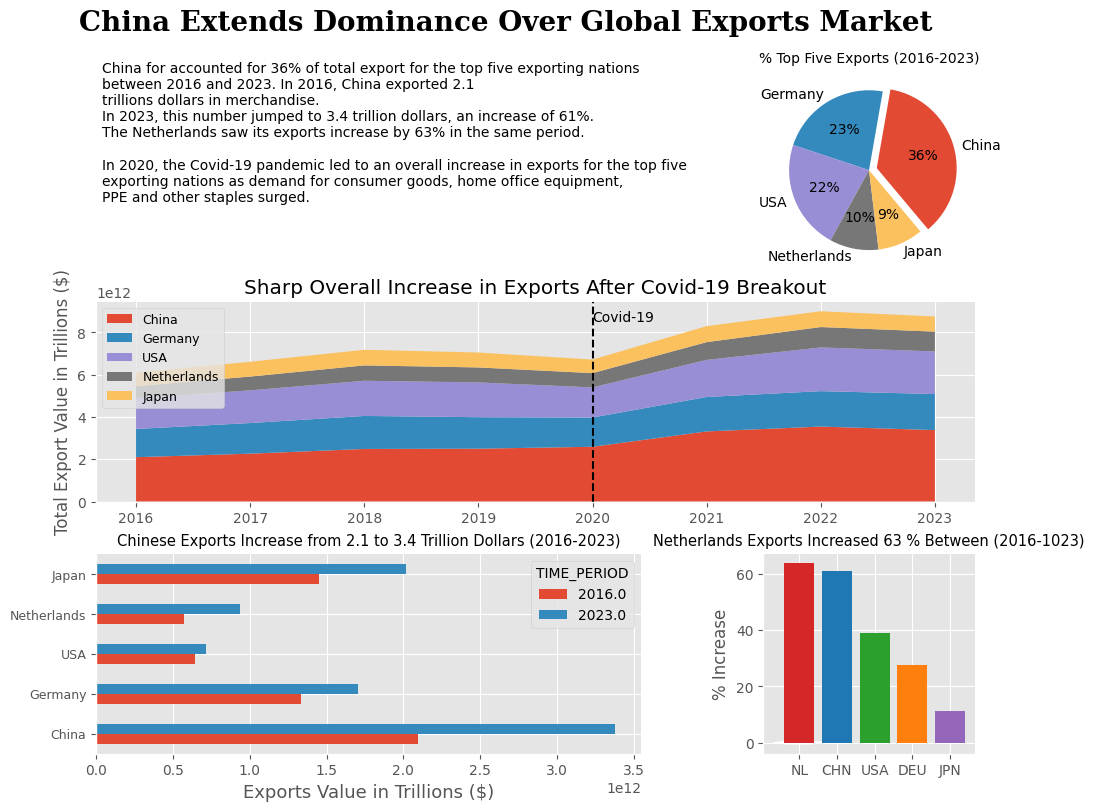

In [10]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure(layout = "constrained", figsize=(10,8))

plt.style.use("ggplot")

gs = GridSpec(3,3, figure = fig)



fig.suptitle("China Extends Dominance Over Global Exports Market",
              fontsize = 20, fontweight = "bold", 
              fontfamily = "serif")


ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=2))
ax2 = plt.subplot(gs.new_subplotspec((0,2), colspan=1))

ax4 = plt.subplot(gs.new_subplotspec((1,0), colspan=3))

ax5 = plt.subplot(gs.new_subplotspec((2,0), colspan=2))
ax6 = plt.subplot(gs.new_subplotspec((2,2), colspan=1))

ax1.set_axis_off()

ax1.text(0.01, 0.1, """
China for accounted for 36% of total export for the top five exporting nations 
between 2016 and 2023. In 2016, China exported 2.1 
trillions dollars in merchandise. 
In 2023, this number jumped to 3.4 trillion dollars, an increase of 61%. 
The Netherlands saw its exports increase by 63% in the same period.
         
In 2020, the Covid-19 pandemic led to an overall increase in exports for the top five  
exporting nations as demand for consumer goods, home office equipment, 
PPE and other staples surged. 
         

""", fontsize = 10)

# Donut Chart
ax2.pie(top5_exporters["OBS_VALUE"],
       labels=top5_exporters.index,
       autopct="%.0f%%",
       startangle=-50,
       #pctdistance=.85,
       explode=[0.1,0,0,0,0]);

hole = plt.Circle((0,0), 0.70, fc = "white")
fig = plt.gcf()

fig.gca().add_artist(hole)

ax2.set_title("% Top Five Exports (2016-2023)", fontsize = 10);




# Stackplot
xval = 2020
ax4.stackplot(top5_stackplot.index,
             top5_stackplot["China"],
             top5_stackplot["Germany"],
             top5_stackplot["USA"],
             top5_stackplot["Netherlands"],
             top5_stackplot["Japan"])
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.legend(fontsize = 10, loc = "upper left")
ax4.set_ylabel("Total Export Value in Trillions ($)")
xval = 2020
ax4.axvline(x = xval, linestyle = "--", color = "black")
ax4.text(xval, 8500000000000, "Covid-19")
ax4.legend(top5_exporters.index, loc = "upper left", fontsize = 9)
ax4.set_title("Sharp Overall Increase in Exports After Covid-19 Breakout")
#ax.set_xlim([2016, 2023])



# Column
top5_side_by_side_barchart.plot(kind = "barh", ax = ax5)
#ax5.set_yticks(top5_side_by_side_barchart.index)  # Ensures all labels have corresponding ticks
ax5.set_yticklabels(top5_side_by_side_barchart.index, fontsize=9)  # Re-adds country names with size adjustment
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)

ax5.set_title("Chinese Exports Increase from 2.1 to 3.4 Trillion Dollars (2016-2023)", fontsize = 10.5)
ax5.set_xlabel("Exports Value in Trillions ($)",
              fontsize = 13 ),
#ax5.set_ylabel("Exporting Nations", fontsize = 10);
#ax5.set_ylim(0.0, 0.6)
#ax5.spines["bottom"].set_visible(False)


ax6.bar(top5_pct_change.index,
       top5_pct_change["pct_change"],
       color = ["#d62728", "#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd"])

ax6.set_xticklabels(["NL", "CHN", "USA", "DEU", "JPN"]);
ax6.set_title("Netherlands Exports Increased 63 % Between (2016-1023)", fontsize = 10.5)
ax6.set_ylabel("% Increase")
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False);

fig.savefig("trade_project_imf_data_2016_2023.png")


C:\Users\ramon\AppData\Local\Temp\ipykernel_11156\1378979194.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(["NL", "CHN", "USA", "DEU", "JPN"]);
C:\Users\ramon\AppData\Local\Temp\ipykernel_11156\1378979194.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax5.legend(fontsize = 10, loc = "upper left")


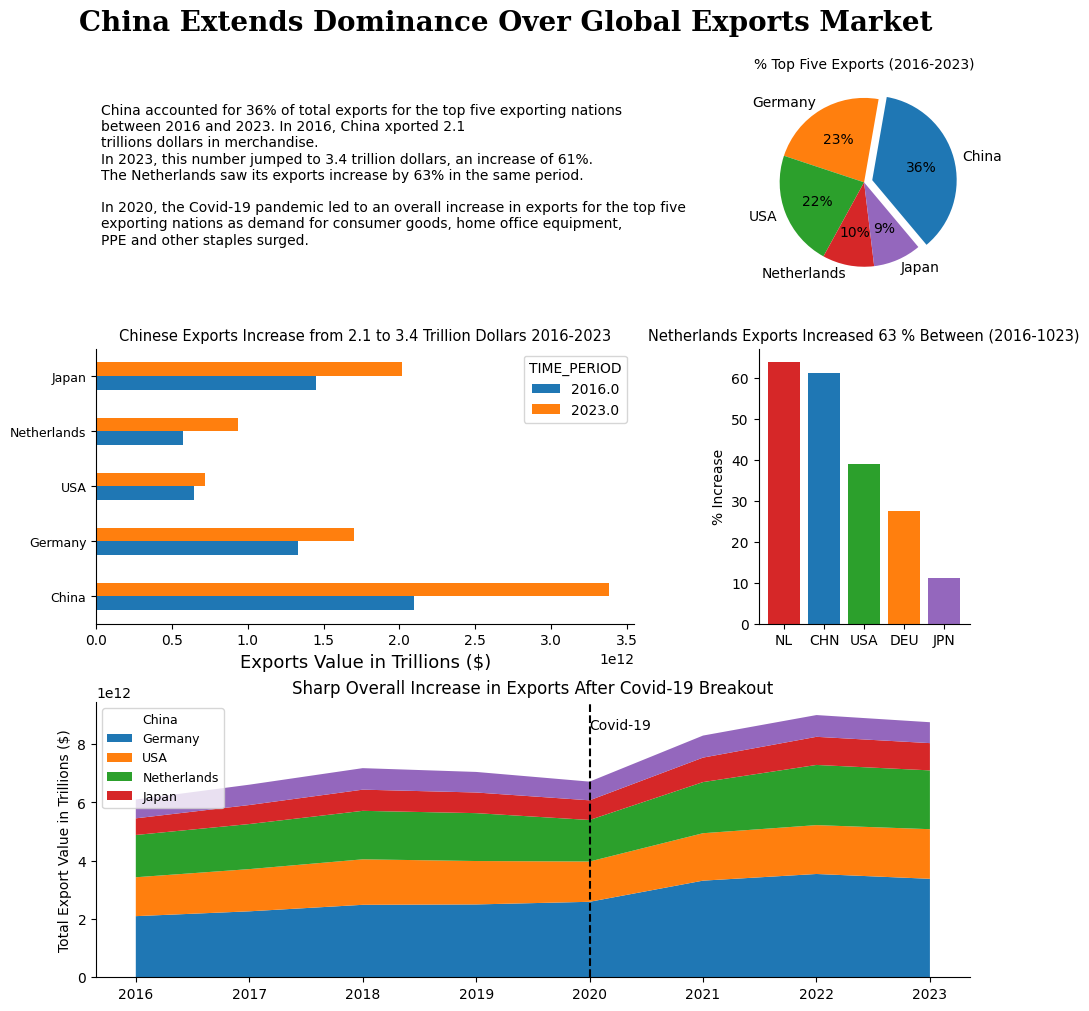

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure(layout = "constrained", figsize=(10,10))

gs = GridSpec(3,3, figure = fig)

plt.style.use("default")

fig.suptitle("China Extends Dominance Over Global Exports Market",
              fontsize = 20, fontweight = "bold", 
              fontfamily = "serif")


ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=2))
ax2 = plt.subplot(gs.new_subplotspec((0,2), colspan=1))

ax3 = plt.subplot(gs.new_subplotspec((1,0), colspan=2))
ax4 = plt.subplot(gs.new_subplotspec((1,2), colspan=1))
ax5 = plt.subplot(gs.new_subplotspec((2,0), colspan=3))
#ax6 = plt.subplot(gs.new_subplotspec((2,2), colspan=1))

ax1.set_axis_off()

ax1.text(0.01, 0.1, """
China accounted for 36% of total exports for the top five exporting nations
between 2016 and 2023. In 2016, China xported 2.1 
trillions dollars in merchandise. 
In 2023, this number jumped to 3.4 trillion dollars, an increase of 61%. 
The Netherlands saw its exports increase by 63% in the same period.
         
In 2020, the Covid-19 pandemic led to an overall increase in exports for the top five  
exporting nations as demand for consumer goods, home office equipment, 
PPE and other staples surged. 
         

""", fontsize = 10)

# # Donut Chart
ax2.pie(top5_exporters["OBS_VALUE"],
       labels=top5_exporters.index,
       autopct="%.0f%%",
       startangle=-50,
       #pctdistance=.85,
       explode=[0.1,0,0,0,0]);

hole = plt.Circle((0,0), 0.70, fc = "white")
fig = plt.gcf()

fig.gca().add_artist(hole)

ax2.set_title("% Top Five Exports (2016-2023)", fontsize = 10);


# Column
top5_side_by_side_barchart.plot(kind = "barh", ax = ax3)
#ax3.set_yticks(top5_side_by_side_barchart.index)  # Ensures all labels have corresponding ticks
ax3.set_yticklabels(top5_side_by_side_barchart.index, fontsize=9)  # Re-adds country names with size adjustment
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax3.set_title("Chinese Exports Increase from 2.1 to 3.4 Trillion Dollars 2016-2023", fontsize = 10.5)
ax3.set_xlabel("Exports Value in Trillions ($)",
              fontsize = 13 ),
# ax3.set_ylabel("Exporting Nations", fontsize = 10);
# ax3.set_ylim(0.0, 0.6)
# ax3.spines["bottom"].set_visible(False)


ax4.bar(top5_pct_change.index,
       top5_pct_change["pct_change"],
       color = ["#d62728", "#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd"])

ax4.set_xticklabels(["NL", "CHN", "USA", "DEU", "JPN"]);
ax4.set_title("Netherlands Exports Increased 63 % Between (2016-1023)", fontsize = 10.5)
ax4.set_ylabel("% Increase")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False);

# Stackplot
xval = 2020
ax5.stackplot(top5_stackplot.index,
             top5_stackplot["China"],
             top5_stackplot["Germany"],
             top5_stackplot["USA"],
             top5_stackplot["Netherlands"],
             top5_stackplot["Japan"])
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
ax5.legend(fontsize = 10, loc = "upper left")
ax5.set_ylabel("Total Export Value in Trillions ($)")
xval = 2020
ax5.axvline(x = xval, linestyle = "--", color = "black")
ax5.text(xval, 8500000000000, "Covid-19")
ax5.legend(top5_exporters.index, loc = "upper left", fontsize = 9)
ax5.set_title("Sharp Overall Increase in Exports After Covid-19 Breakout")
# #ax.set_xlim([2016, 2023])

fig.savefig("trade_project_2.png")

In [1]:
import polars as pl
import pandas as pd

In [12]:
oec_exports["year"].unique()

array([2022, 2023])

,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name
0,2022,usa,United States,chl,Chile,660320,Umbrella frames,6,873.0,0.018,mt,Metric Tonne
1,2022,usa,United States,chl,Chile,660390,"Parts & trimmings, of umbrella, walking sticks...",6,10262.0,0.372,mt,Metric Tonne
2,2022,usa,United States,chl,Chile,670100,"Bird skins and feathers, articles therefrom",6,1290.0,0.028,mt,Metric Tonne
3,2022,usa,United States,chl,Chile,670210,"Artificial flowers foliage fruit, articles, pl...",6,34788.0,3.322,mt,Metric Tonne
4,2022,usa,United States,chl,Chile,670290,Artificial flowers foliage fruit etc except pl...,6,23916.0,0.585,mt,Metric Tonne


In [3]:
import pandas as pd
import pyarrow.parquet as pq

In [4]:
oec_exports = pd.read_csv("trade_i_baci_a_92.csv", usecols=["year", "exporter_name",
                                                           "importer_name", "hs_code", 
                                                           "product_name", "value"],
                                                           dtype={"year": "int16",
                                                                  "importer_name": "string",
                                                                  "hs_code": "category",
                                                                  "product_name": "string"}
                                                                  
                                                                  )

KeyboardInterrupt: 

In [4]:
oec_exports.head()

,year,exporter_name,importer_name,hs_code,product_name,value
0,1995,Czechia,Senegal,620463,"Womens, girls trousers, shorts, synth fibres, ...",6283.0
1,1995,Czechia,Senegal,621132,"Mens, boys garments nes, of cotton, not knit",618.0
2,1995,Czechia,Senegal,650590,"Hats and other headgear, knit or crochet, nes",43789.0
3,1995,Czechia,Senegal,690890,Glazed Ceramic Flags/Tiles (>7cm),5288.0
4,1995,Czechia,Senegal,701321,Drinking glasses of lead crystal,67205.0


In [ ]:
pip install sqlalchemy psycopg2

In [ ]:
china_to_usa_exports_pivot

In [ ]:
pip install --upgrade sqlalchemy

In [54]:
from sqlalchemy import create_engine
import pandas as pd

In [ ]:
username = "postgres"
password = "Ra08363008"
host = "localhost"

dbname = "postgres"

engine = create_engine(f"postgresql://{username}:{password}@{host}/{dbname}")

# # TOTAL WORLD EXPORTS
# query = """select year, sum(value) as total_world_exports 
# from oec_exports_full 
# group by year"""
# total_world_exports = pd.read_sql(query, engine)

# # USA TO CHINA EXPORTS
# usa_china_query = """select year, sum(value) as usa_to_china_exports
# from oec_exports_full
# where exporter_name = 'United States' 
# and importer_name = 'China'
# group by year"""
# usa_to_china_exports = pd.read_sql(usa_china_query, engine)
# usa_to_china_exports["year"] = usa_to_china_exports["year"].astype("object")
# usa_to_china_exports.to_csv("usa_to_china_exports.csv",index=False)

# # USA TO WORLD EXPORTS
# usa_world_query = """select year, sum(value) as usa_to_world_exports
# from oec_exports_full 
# where exporter_name = 'United States'
# group by year"""
# usa_to_world_exports = pd.read_sql(usa_world_query, engine)
# usa_to_world_exports["year"] = usa_to_world_exports["year"].astype("object")
# usa_to_world_exports.to_csv("usa_to_world_exports.csv", index=False)

# # CHINA TO USA EXPORTS
# china_usa_query = """select year, sum(value) as china_to_usa_exports
# from oec_exports_full
# where exporter_name = 'China'
# and importer_name = 'United States'
# group by year"""
# china_to_usa_exports = pd.read_sql(china_usa_query, engine)
# china_to_usa_exports["year"] = china_to_usa_exports["year"].astype("object")
# china_to_usa_exports.to_csv("china_to_usa_exports.csv", index = False)

# # CHINA TO WORLD EXPORTS
# china_world_query = """select year, sum(value) as china_to_world_exports
# from oec_exports_full
# where exporter_name = 'China'
# group by year"""
# china_to_world_exports = pd.read_sql(china_world_query, engine)
# china_to_world_exports["year"] = china_to_world_exports["year"].astype("object")
# china_to_world_exports.to_csv("china_to_world_exports.csv", index = False)


# CHINA TOP EXPORT DESTINATIONS
# china_top_exports_destinations_2016_2020_query = """select year, exporter_name, importer_name,
# hs_code, product_name, value
# from oec_exports_full
# where year in (2016, 2017, 2018, 2019, 2020)
# and exporter_name = 'China'"""
# china_top_export_destinations_2016_2017 = pd.read_sql(china_top_exports_destinations_2016_2020_query, engine)
# china_top_export_destinations_2016_2017.to_csv("china_top_export_destinations_2016_2020.csv")




# 100% STACKED BAR CHART

# china_usa_worldstackedBarchart = china_to_world_exports
# china_usa_worldstackedBarchart["usa_to_world_exports"] = usa_to_world_exports["usa_to_world_exports"]
# china_usa_worldstackedBarchart = china_usa_worldstackedBarchart.set_index("year")
# china_usa_worldstackedBarchart = china_usa_worldstackedBarchart.apply(lambda x: x * 100 / sum(x), axis = 1)


# CHINA TO WORLD TOP 50 EXPORT PRODUCTS
# product_query = """select product_name, sum(value) as china_top50_export_products
# from oec_exports_full
# where exporter_name = 'China'
# group by product_name
# order by china_top50_export_products desc
# limit 50"""
# china_top50_export_products = pd.read_sql(product_query, engine)

# columns_query = """select year, exporter_name, 
# importer_name, hs_code, product_name, value
# from oec_exports_full"""

# products_table = pd.read_sql(columns_query, engine)


china_to_world_exports_query = """select year, exporter_name, importer_name, hs_code, product_name, value
from oec_exports_full"""""" 
where year in (2017, 2018, 2019, 2020, 2021)
AND exporter_name = 'China'"""
china_to_world_exports = pd.read_sql(china_to_world_exports_query, engine)
china_to_world_exports.to_csv("china_to_world_exports.csv", index = False)



In [3]:
import pandas as pd
#import matplotlib.pyplot as plt

china_to_world_exports = pd.read_csv("china_to_usa_exports.csv")

In [4]:
china_to_world_exports = china_to_world_exports[china_to_world_exports["importer_name"] != "United States"]

In [ ]:
china_to_world_exports[china_to_world_exports["importer_name"] == 'United States']

,Unnamed: 0,year,exporter_name,importer_name,hs_code,product_name,value


In [ ]:
(china_to_world_exports
 .pivot_table(index = ))

In [73]:
(china_to_world_exports[
    china_to_world_exports["product_name"]
    .isin(["Parts & Accessories for Data Processing Equipment (n.e.)",
           "Static converters, nes",
           "Electrical control and distribution boards, < 1kV"])]
 .pivot_table(index = "product_name", columns = "year", values = "value", aggfunc = "sum")
 .sort_values(by = 2017, ascending = False)
 .style
 .format("{:,.0f}")
 .background_gradient()

 )

ImportError: background_gradient requires matplotlib.

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ramon\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\_c_internal_utils.cp312-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ramon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)


: 

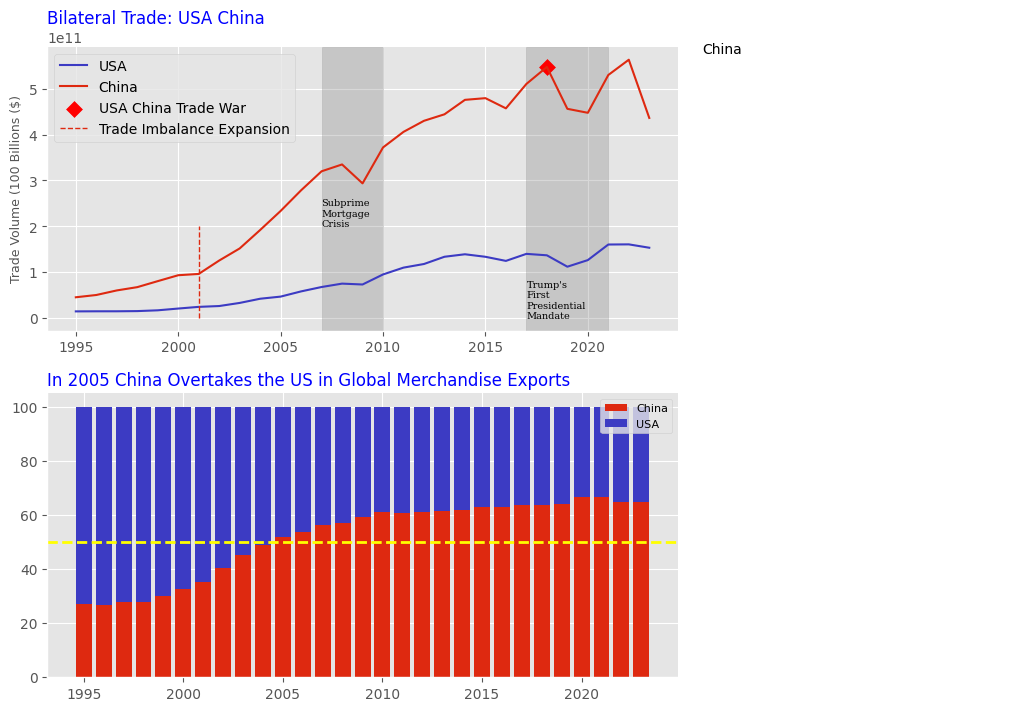

In [96]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

fig = plt.figure(layout = "constrained", figsize = (10,7))

gs = GridSpec(2,3, figure = fig)

plt.style.use("ggplot")


ax = plt.subplot(gs.new_subplotspec((0,0), colspan = 2));
ax1 = plt.subplot(gs.new_subplotspec((0,2), rowspan= 3))
ax1.axis("off")
ax2 = plt.subplot(gs.new_subplotspec((1,0), colspan = 2))



ax.plot(usa_to_china_exports["year"],
        usa_to_china_exports["usa_to_china_exports"], label = "USA", color = "#3C3BC3");
ax.plot(china_to_usa_exports["year"],
        china_to_usa_exports["china_to_usa_exports"], label = "China", color = "#DE2910");

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.axvline(2017, color = "#3C3BC3", label = "Trump's First Mandate", linestyle = "--")
#ax.text(2017, 5e9, "Trump's First Term", fontsize = 8, color = "#3C3BC3")
#ax.axvline(2021, color = "#3C3BC3", linestyle = "--")
ax.axvspan(2017, 2021, color = "gray", alpha = 0.3)
ax.text(2017, 2021, """Trump's\nFirst\nPresidential\nMandate""", fontsize = 7, fontfamily = "serif")

ax.axvspan(2007, 2010, color = "gray", alpha = 0.3)
ax.text(2007, 2e11, """Subprime\nMortgage\nCrisis""", fontsize = 7, fontfamily = "serif")



#ax.axvline(2007, color = "#DE2910", linestyle = "--", lw=1, label = "Subprime Mortgage Crisis")
x_start, x_end = [2001, 2001]
y_start, y_end = [1e9, 2e11]



point_x, point_y = 2018, 547225284926.0
ax.scatter(point_x, point_y, marker ='D', s=65, color = "red", label = "USA China Trade War")



ax.plot([x_start, x_end], [y_start, y_end], color = "#DE2910", linestyle = "--", lw=1, label = "Trade Imbalance Expansion")
ax.set_ylabel("Trade Volume (100 Billions ($)", fontsize = 9)
# ax.set_xticks([])
# ax.set_xlabel('')

ax.set_title("Bilateral Trade: USA China", loc = "left", color = "blue", fontsize = 12)

ax.legend();


ax1.text(0.05, 0.99, """China""")



ax2.bar(china_usa_worldstackedBarchart.index,
        china_usa_worldstackedBarchart["china_to_world_exports"],
        label = "China", color = "#DE2910")
ax2.bar(china_usa_worldstackedBarchart.index,
        china_usa_worldstackedBarchart["usa_to_world_exports"],
        label = "USA", color = "#3C3BC3",
        bottom=china_usa_worldstackedBarchart["china_to_world_exports"])

ax2.axhline(50, lw = 2, linestyle = "--", color = "yellow")
#ax2.text(20)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_title("In 2005 China Overtakes the US in Global Merchandise Exports", fontsize = 12, loc = "left", color = "blue")
ax2.legend(fontsize = 8);

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ramon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install --force-reinstall --no-deps matplotlib==3.10.3

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ramon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
error: uninstall-no-record-file

× Cannot uninstall matplotlib 3.10.3
╰─> The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.10.3


In [20]:
import pandas as pd
china_top_export_destinations_2016_2017 = pd.read_csv("china_top_export_destinations_2016_2017.csv")



In [48]:
china_top30_digital_computers_importers = (china_top_export_destinations_2016_2017[
    china_top_export_destinations_2016_2017["product_name"] == "Digital Computers with CPU & I/O Units"]
    .pivot_table(index = "importer_name", columns = "year", values = "value", aggfunc= "sum")
    #.sort_values(by = [2016, 2018], ascending=False)
    .nlargest(columns=2016, n =30)
    )

china_top30_digital_computers_importers.to_csv("china_top30_digital_computers_importers.csv")



In [49]:
china_top30_digital_computers_importers

year,2016,2017,2018,2019,2020
importer_name,,,,,
United States,3.493321e+10,1.090036e+09,1.089782e+09,1.320928e+09,8.193310e+08
Germany,7.481481e+09,1.200216e+08,1.360012e+08,1.133726e+08,1.527904e+08
Hong Kong,7.338727e+09,1.439489e+08,1.644661e+08,2.123204e+08,1.604544e+08
Japan,6.087254e+09,1.484342e+08,1.412841e+08,1.745500e+08,2.214733e+08
Netherlands,3.896681e+09,1.254908e+08,1.331782e+08,1.886446e+08,2.304085e+08
United Kingdom,3.866170e+09,3.820510e+07,2.915802e+07,5.253404e+07,4.394915e+07
Canada,3.419908e+09,9.246682e+06,2.356113e+08,2.326479e+08,2.517532e+08
Australia,2.761087e+09,2.765969e+08,2.425118e+08,1.965822e+08,2.217433e+08
France,2.662589e+09,9.512186e+07,9.802479e+07,8.537312e+07,1.295274e+07


In [51]:
pip install matplotlib==3.1.0

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/37.2 MB ? eta -:--:--
     - -------------------------------------- 1.6/37.2 MB 7.6 MB/s eta 0:00:05
     --- ------------------------------------ 3.1/37.2 MB 7.7 MB/s eta 0:00:05
     ----- ---------------------------------- 4.7/37.2 MB 7.5 MB/s eta 0:00:05
     ------ --------------------------------- 6.3/37.2 MB 7.6 MB/s eta 0:00:05
     -------- ------------------------------- 7.9/37.2 MB 7.6 MB/s eta 0:00:04
     ---------- ----------------------------- 9.4/37.2 MB 7.5 MB/s eta 0:00:04
     ----------- ---------------------------- 11.0/37.2 MB 7.6 MB/s eta 0:00:04
     ------------- -------------------------- 12.6/37.2 MB 7.6 MB/s eta 0:00:04
     --------------- ------------------------ 14.2/37.2 MB 7.5 MB/s eta 0:00:04
     ---------------- ----------------------- 15.7/37.2 MB 7.6 MB/s et

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      <string>:31: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
              ********************************************************************************
      
      !!
      Traceback (most recent call last):
        File "C:\Users\ramon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process

In [50]:
top30 = pd.read_csv("china_top30_digital_computers_importers.csv")
top30

,importer_name,2016,2017,2018,2019,2020
0,United States,3.493321e+10,1.090036e+09,1.089782e+09,1.320928e+09,8.193310e+08
1,Germany,7.481481e+09,1.200216e+08,1.360012e+08,1.133726e+08,1.527904e+08
2,Hong Kong,7.338727e+09,1.439489e+08,1.644661e+08,2.123204e+08,1.604544e+08
3,Japan,6.087254e+09,1.484342e+08,1.412841e+08,1.745500e+08,2.214733e+08
4,Netherlands,3.896681e+09,1.254908e+08,1.331782e+08,1.886446e+08,2.304085e+08
5,United Kingdom,3.866170e+09,3.820510e+07,2.915802e+07,5.253404e+07,4.394915e+07
6,Canada,3.419908e+09,9.246682e+06,2.356113e+08,2.326479e+08,2.517532e+08
7,Australia,2.761087e+09,2.765969e+08,2.425118e+08,1.965822e+08,2.217433e+08
8,France,2.662589e+09,9.512186e+07,9.802479e+07,8.537312e+07,1.295274e+07
9,Mexico,2.041425e+09,1.670963e+09,1.761696e+09,1.694300e+09,1.691632e+09


Note: you may need to restart the kernel to use updated packages.


In [40]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [38]:
china_top30_digital_computers_importers.style.background_gradient()

ImportError: background_gradient requires matplotlib.

In [ ]:
# USE THIS DATA TO SHOW WHAT TOP 10 PRODUCTS WERE MOST EXPORTED TO THE USA IN 2018 AND 2019 AND HIGHLIGHT THE DIFFERENCE
# TRY TO SPOT THE INCREASE IN EXPORTS OF THESE PRODUCTS TO OTHER CHINESE TRADING PARTNERS

# USA TO CHINA DATA

usa_to_china_data_2017 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2017) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "United States")
])

usa_to_china_data_2018 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2018) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "United States")
])

usa_to_china_data_2019 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2019) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "United States")
])

usa_to_china_data_2020 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2020) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "United States")
])


# CHINA TO USA DATA

china_to_usa_data_2016 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2016) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "China")
])

china_to_usa_data_2017 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2017) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "China")
])

china_to_usa_data_2018 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2018) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "China")
])

china_to_usa_data_2019 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2019) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "China")
])

china_to_usa_data_2020 = (usa_and_china_data_2016_to_2020[
    (usa_and_china_data_2016_to_2020["year"] == 2020) &
    (usa_and_china_data_2016_to_2020["exporter_name"] == "China")
])



# PIVOTS

# TOP 10 CHINA TO USA
top10_china_exports_to_usa_2016 = (china_to_usa_data_2016
                                   .pivot_table(index = "product_name", values = "value", aggfunc="sum")
                                   .sort_values(by = "value", ascending = True)
                                   .nlargest(columns = "value", n = 10))

top10_china_exports_to_usa_2017 = (china_to_usa_data_2017
                                   .pivot_table(index = "product_name", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10))

top10_china_exports_to_usa_2018 = (china_to_usa_data_2018
                                   .pivot_table(index = "product_name", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10))

top10_china_exports_to_usa_2019 = (china_to_usa_data_2019
                                   .pivot_table(index = "product_name", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10))

top10_china_exports_to_usa_2020 = (china_to_usa_data_2020
                                   .pivot_table(index = "product_name", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10))

top10_hscode_china_to_usa_2017 =(china_to_usa_data_2017
                                   .pivot_table(index = "hs_code", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10)) 

top10_hscode_china_to_usa_2018 =(china_to_usa_data_2018
                                   .pivot_table(index = "hs_code", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10)) 

top10_hscode_china_to_usa_2019 = (china_to_usa_data_2019
                                   .pivot_table(index = "hs_code", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10))

top10_hscode_china_to_usa_2020 =(china_to_usa_data_2020
                                   .pivot_table(index = "hs_code", values = "value", aggfunc="sum")
                                   .nlargest(columns = "value", n = 10)) 


In [84]:
top10_china_exports_to_usa_2016.index.isin(top10_china_exports_to_usa_2020.index)  # Returns a boolean array

array([ True, False,  True,  True, False,  True, False, False, False,
       False])

In [12]:
pip uninstall matplotlib seaborn


Found existing installation: matplotlib 3.10.3
Note: you may need to restart the kernel to use updated packages.


error: uninstall-no-record-file

× Cannot uninstall matplotlib 3.10.3
╰─> The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.10.3


In [14]:
pip install --force-reinstall --no-deps matplotlib==3.10.3

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ramon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
error: uninstall-no-record-file

× Cannot uninstall matplotlib 3.10.3
╰─> The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.10.3


In [15]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

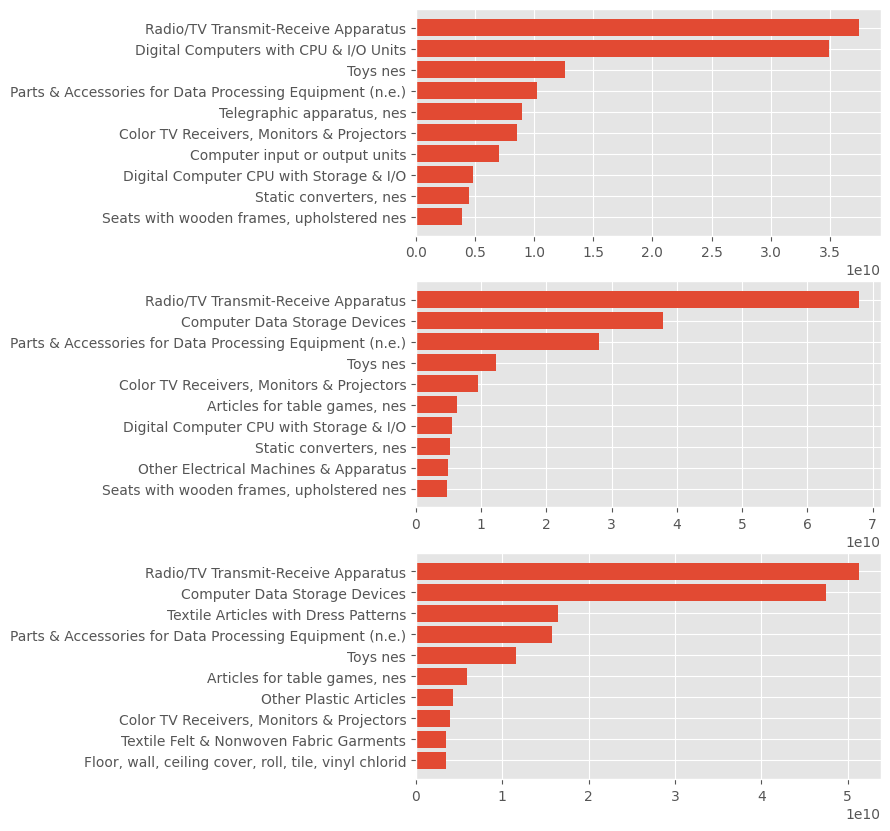

In [168]:
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (6,10))

ax[0].barh(top10_china_exports_to_usa_2016.index,
         top10_china_exports_to_usa_2016["value"])
# ax[0][0].set_yticklabels([])
# ax[0][0].bar_label(china_usa_2016, labels=top10_china_exports_to_usa_2016.index, 
#                    label_type='edge', color='black', fontsize=12, padding = -100)
ax[0].invert_yaxis()


# china_usa_2017 = ax[0][1].barh(top10_china_exports_to_usa_2017.index,
#          top10_china_exports_to_usa_2017["value"])
# ax[0][1].bar_label(china_usa_2017, labels=top10_china_exports_to_usa_2017.index, label_type='edge', color='black', fontsize=12)
# ax[0][1].set_yticklabels([])


ax[1].barh(top10_china_exports_to_usa_2018.index,
         top10_china_exports_to_usa_2018["value"])
# ax[1][0].set_yticklabels([])
# ax[1][0].bar_label(china_usa_2018, labels=top10_china_exports_to_usa_2018.index, label_type='center', color='black', fontsize=12)
ax[1].invert_yaxis()


# 2019
# china_usa_2019 = ax[1][1].barh(top10_china_exports_to_usa_2019.index,
#          top10_china_exports_to_usa_2019["value"])
# ax[1][1].set_yticklabels([])
# ax[1][1].bar_label(china_usa_2019, labels=top10_china_exports_to_usa_2019.index, label_type='center', color='black', fontsize=12)


ax[2].barh(top10_china_exports_to_usa_2020.index,
         top10_china_exports_to_usa_2020["value"])
# ax[2][0].set_yticklabels([])
# ax[2][0].bar_label(china_usa_2020, labels=top10_china_exports_to_usa_2020.index, label_type='center', color='black', fontsize=12)
ax[2].invert_yaxis()



<Axes: xlabel='value', ylabel='product_name'>

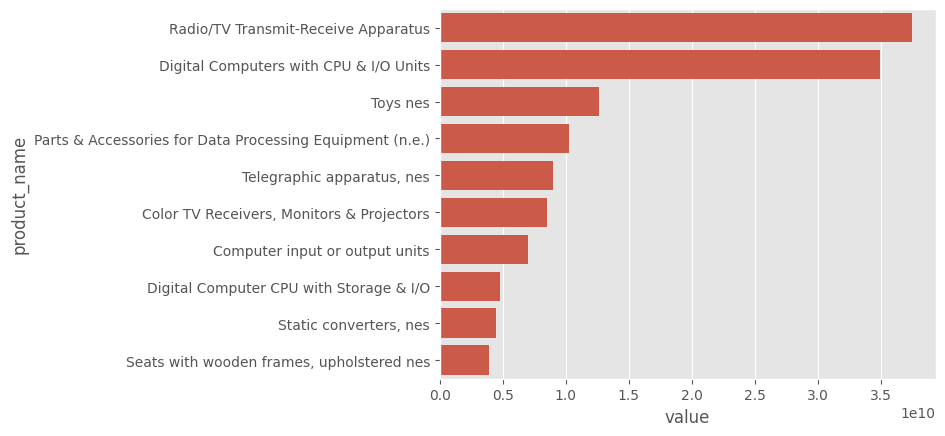

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(y = top10_china_exports_to_usa_2016.index,
            x = top10_china_exports_to_usa_2016["value"])

# fig, ax = plt.subplots()
# bars = ax.barh(x, y)

# # Manually add labels inside bars
# for bar, label in zip(bars, y):
#     ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, str(label),
#             ha='right', va='top', fontsize=12, color='white')

# plt.show()

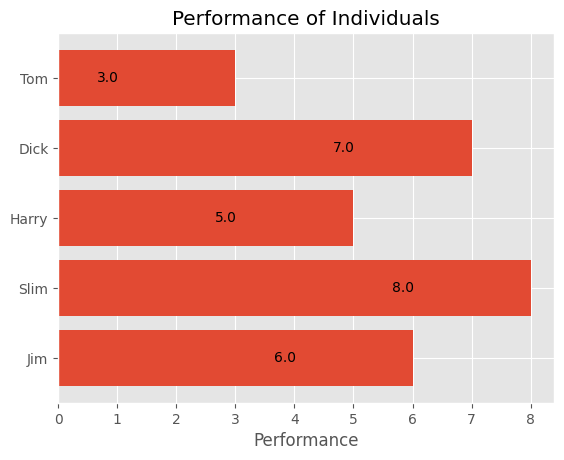

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
people = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim']
y_pos = np.arange(len(people))
performance = [3, 7, 5, 8, 6]

# Create horizontal bar chart
fig, ax = plt.subplots()
hbars = ax.barh(y_pos, performance, align='center')

# Add labels to bars
ax.bar_label(hbars, fmt='%.1f', label_type="edge", padding=-100)  # Format labels as floating-point numbers

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Performance of Individuals')

plt.show()

In [13]:
top10_hscode_china_to_usa_2019

,value
hs_code,
852520,5.668256e+10
847193,3.782136e+10
847330,1.590035e+10
950390,1.278901e+10
852810,7.060873e+09
950490,4.321681e+09
850440,3.980707e+09
392690,3.868195e+09
854380,3.631153e+09


In [ ]:
label= top10_exports_china_usa.index.tolist()
label = [name[:13]  if len(name) > 10 else name for name in label]
squarify.plot(sizes = top10_exports_china_usa["value"], label = label, ax = ax2, alpha=0.7, text_kwargs={"fontsize": 8})

## Data on tariffs and other code to be left alone for the moment

In [70]:
list_hscode_usa_to_china_2019 = (usa_to_china_data_2019
 .pivot_table(index = "hs_code", values = "value", aggfunc = "sum")
 .sort_values(by = "value", ascending=False)
 .nlargest(columns="value", n = 15)
 .index
 .to_list())

list_hscode_usa_to_china_2019

[854211,
 120100,
 880240,
 870323,
 270900,
 901020,
 870390,
 300210,
 841112,
 300490,
 847990,
 841191,
 901890,
 470321,
 382200]

In [73]:
usa_and_china_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16679 entries, 0 to 16678
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           16679 non-null  int64  
 1   exporter_name  16679 non-null  object 
 2   importer_name  16679 non-null  object 
 3   hs_code        16679 non-null  int64  
 4   product_name   16679 non-null  object 
 5   value          16679 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 782.0+ KB


In [75]:
china_to_usa_data_2018.head()

,year,exporter_name,importer_name,hs_code,product_name,value
1,2018,China,United States,10119,Non-breeding Horses,256868.0
2,2018,China,United States,10600,Live Animals (Not Farm Types),45637402.0
3,2018,China,United States,20442,Frozen Sheep Cuts with Bone,72465.0
4,2018,China,United States,20443,Frozen Boneless Sheep Cuts,83134.0
5,2018,China,United States,20690,"Frozen Organs (Sheep, Goat, Donkey, Mule, Hinny)",7732.0


In [ ]:
list_hscode_usa_to_china_2019 = (list_usa_to_china_data_2019
 .pivot_table(index = "hs_code", values = "value", aggfunc = "sum")
 .sort_values(by = "value", ascending=False)
 .nlargest(columns="value", n = 15)
 .index
 .to_list())

print(list_hscode_usa_to_china_2018)

[880240, 854211, 120100, 270900, 870323, 901020, 710812, 300210, 870390, 300490, 740400, 470710, 470321, 520100, 841112]


In [71]:
usa_china_tariffs_2019[usa_china_tariffs_2019["hs_code"].isin([list_hscode_usa_to_china_2019])]

,reporter_name,partner_name,hs_code,product_name,agreement_name,tariff


In [ ]:
usa_and_china_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16679 entries, 0 to 16678
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           16679 non-null  int64  
 1   exporter_name  16679 non-null  object 
 2   importer_name  16679 non-null  object 
 3   hs_code        16679 non-null  int64  
 4   product_name   16679 non-null  object 
 5   value          16679 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 782.0+ KB


In [52]:
usa_and_china_data["hs_code"].nunique()

4471

In [ ]:
(usa_and_china_data
 .pivot_table(index = "hs_code", values = "value", aggfunc="sum")
 .sort_values(by = "value", ascending = False)
 .nlargest(columns = "value", n = 15))

,value
hs_code,
852520,1.252369e+11
847193,7.609096e+10
847330,4.499735e+10
854211,2.584302e+10
950390,2.513120e+10
880240,2.198269e+10
852810,1.667368e+10
120100,1.429392e+10
870323,1.271214e+10


In [56]:
usa_china_tariffs_2019.query('hs_code in @pivot_usa_to_china_exports_2018.index')

,reporter_name,partner_name,hs_code,product_name,agreement_name,tariff


In [2]:
china_usa_tariffs_2019 = pd.read_csv("china_usa_tariffs_2019.csv")

In [3]:
china_usa_tariffs_2019.head()

,reporter_name,partner_name,hs_code,product_name,agreement_name,tariff
0,China,United States,8526919010,\N,Most Favoured Nation duty rate treatment,0.5
1,China,United States,8526911000,\N,Most Favoured Nation duty rate treatment,0.5
2,China,United States,8526919090,\N,Most Favoured Nation duty rate treatment,0.5
3,China,United States,8526920000,\N,Most Favoured Nation duty rate treatment,2.5
4,China,United States,8527120000,\N,Most Favoured Nation duty rate treatment,5.0


In [4]:
china_usa_tariffs_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11938 entries, 0 to 11937
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reporter_name   11938 non-null  object 
 1   partner_name    11938 non-null  object 
 2   hs_code         11938 non-null  object 
 3   product_name    11938 non-null  object 
 4   agreement_name  11938 non-null  object 
 5   tariff          11938 non-null  float64
dtypes: float64(1), object(5)
memory usage: 559.7+ KB


In [5]:
usa_china_tariffs_2019 = pd.read_csv("usa_china_tariffs_2019.csv")

In [6]:
usa_china_tariffs_2019.head()

,reporter_name,partner_name,hs_code,product_name,agreement_name,tariff
0,United States,China,2031100,\N,Most Favoured Nation duty rate treatment,0.00
1,United States,China,2031290,\N,Most Favoured Nation duty rate treatment,0.00
2,United States,China,2031210,\N,Most Favoured Nation duty rate treatment,0.65
3,United States,China,2031940,\N,Most Favoured Nation duty rate treatment,0.00
4,United States,China,2031920,\N,Most Favoured Nation duty rate treatment,0.41


In [8]:
usa_china_tariffs_2019["tariff"].nlargest(n=2)

1903    378736.6
1918    283291.3
Name: tariff, dtype: float64

In [11]:
usa_china_tariffs_2019.iloc[[1903, 1918]]

,reporter_name,partner_name,hs_code,product_name,agreement_name,tariff
1903,United States,China,22029928,\N,Most Favoured Nation duty rate treatment,378736.6
1918,United States,China,22042981,\N,Most Favoured Nation duty rate treatment,283291.3


<Axes: ylabel='Frequency'>

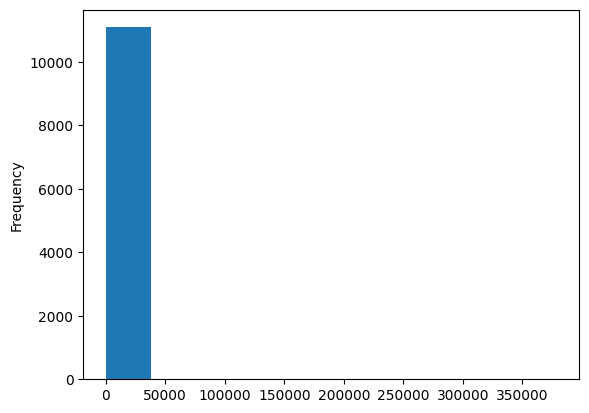

In [18]:
usa_china_tariffs_2019["tariff"].plot(kind = "hist", bins = 10)

In [33]:
usa_china_tariffs_2019[usa_china_tariffs_2019["tariff"] < 1]["hs_code"].nunique()

4694

In [37]:
# Read only the first chunk of 100,000 rows
df_iter = pd.read_csv("tariffs_i_wits_a_hs_new_2019.csv", chunksize=100000)

# Check the first few rows of the first chunk
df_sample = next(df_iter)  # Fetch the first chunk
print(df_sample.head())  # Inspect column names & structure

   year reporter_name reporter_id      partner_name partner_id   hs_code  \
0  2019         Kenya         ken              Niue        niu  66011000   
1  2019         Kenya         ken             Nauru        nru  66011000   
2  2019         Kenya         ken       New Zealand        nzl  66011000   
3  2019         Kenya         ken  Pitcairn Islands        pcn  66011000   
4  2019         Kenya         ken             Palau        plw  66011000   

  product_name  hs_revision                            agreement_name  tariff  
0           \N            5  Most Favoured Nation duty rate treatment    25.0  
1           \N            5  Most Favoured Nation duty rate treatment    25.0  
2           \N            5  Most Favoured Nation duty rate treatment    25.0  
3           \N            5  Most Favoured Nation duty rate treatment    25.0  
4           \N            5  Most Favoured Nation duty rate treatment    25.0  


In [ ]:
oec_tariffs_2019 = pd.read_csv("tariffs_i_wits_a_hs_new_2019.csv", usecols = [""])

array(['\\N'], dtype=object)

In [6]:
import pandas as pd
oec_tariffs_2019 = pd.read_csv("tariffs_i_wits_a_hs_new_2019.csv", usecols=["reporter_name",
                                                                            "partner_name", "hs_code",
                                                                            "agreement_name", "tariff"],
                                                                            dtype = {"reporter_name": "string",
                                                                                     "partner_name": "string",
                                                                                     "agreement_name": "string"})

MemoryError: 

In [31]:
top10_products = (oec_trade_data_2019[
    (oec_trade_data_2019["exporter_name"] == "China") & 
    (oec_trade_data_2019["importer_name"] == "United States")]
    .pivot_table(index = "product_name", values = "value", aggfunc = "sum")
    .sort_values(by = "value", ascending=False)
    .nlargest(columns="value", n = 10))

In [32]:
top10_products

,value
product_name,
Radio/TV Transmit-Receive Apparatus,5.668256e+10
Computer Data Storage Devices,3.782136e+10
Parts & Accessories for Data Processing Equipment (n.e.),1.590035e+10
Toys nes,1.278901e+10
"Color TV Receivers, Monitors & Projectors",7.060873e+09
"Articles for table games, nes",4.321681e+09
"Static converters, nes",3.980707e+09
Other Plastic Articles,3.868195e+09
Other Electrical Machines & Apparatus,3.631153e+09


In [25]:
top10_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 852520 to 940161
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [21]:
oec_trade_data_2018.query("product_name in @top10_products.index")

,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name


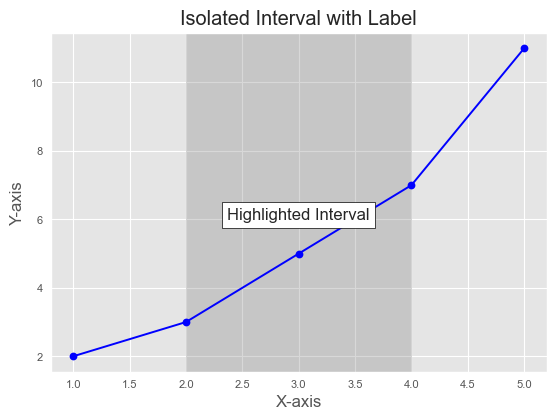

In [308]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

fig, ax = plt.subplots()
ax.plot(x, y, marker='o', linestyle='-', color='b')

# Highlight a specific interval
ax.axvspan(2, 4, color='gray', alpha=0.3)  # Shades between x=2 and x=4

# Add a label to the highlighted region
ax.text(3, 6, "Highlighted Interval", fontsize=12, ha='center', bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Isolated Interval with Label")
plt.show()

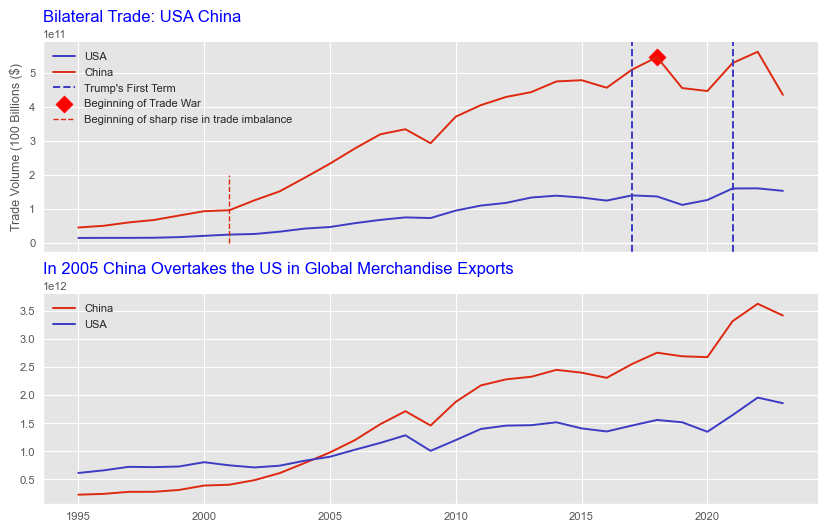

In [283]:
fig, ax = plt.subplots(figsize = (10, 6), nrows = 2, ncols = 1, sharex=True)

ax[0].plot(usa_to_china_exports["year"],
        usa_to_china_exports["usa_to_china_exports"], label = "USA", color = "#3C3BC3");
ax[0].plot(china_to_usa_exports["year"],
        china_to_usa_exports["china_to_usa_exports"], label = "China", color = "#DE2910");

ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax[0].axvline(2017, color = "#3C3BC3", label = "Trump's First Term", linestyle = "--")
#ax.text(2017, 5e9, "Trump's First Term", fontsize = 8, color = "#3C3BC3")
ax[0].axvline(2021, color = "#3C3BC3", linestyle = "--")
#ax.axvline(2001, color = "#DE2910", linestyle = "--", lw=1)
x_start, x_end = [2001, 2001]
y_start, y_end = [1e9, 2e11]



point_x, point_y = 2018, 547225284926.0
ax[0].scatter(point_x, point_y, marker ='D', s=75, color = "red", label = "Beginning of Trade War")



ax[0].plot([x_start, x_end], [y_start, y_end], color = "#DE2910", linestyle = "--", lw=1, label = "Beginning of sharp rise in trade imbalance")
ax[0].set_ylabel("Trade Volume (100 Billions ($)", fontsize = 9)
# ax.set_xticks([])
# ax.set_xlabel('')

ax[0].set_title("Bilateral Trade: USA China", loc = "left", color = "blue", fontsize = 12)

ax[0].legend();





ax[1].plot(china_to_world_exports["year"],
        china_to_world_exports["china_to_world_exports"],
        label = "China", color = "#DE2910")

ax[1].plot(china_to_world_exports["year"],
        china_to_world_exports["usa_to_world_exports"],
        label = "USA", color = "#3C3BC3")

#ax[1].axhline(50, lw = 2, linestyle = "--", color = "yellow")
#ax2.text(20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].set_title("In 2005 China Overtakes the US in Global Merchandise Exports", fontsize = 12, loc = "left", color = "blue")
ax[1].legend(fontsize = 8);

In [277]:
china_to_world_exports

,year,china_to_world_exports,usa_to_world_exports
0,1995,"228,749,368,206.00000000000000000000","615,484,885,874.00000000000000000000"
1,1996,"242,635,458,547.00000000000000000000","661,443,588,465.00000000000000000000"
2,1997,"279,479,821,496.00000000000000000000","724,406,750,644.00000000000000000000"
3,1998,"280,184,711,666.00000000000000000000","719,565,029,428.00000000000000000000"
4,1999,"312,787,818,748.00000000000000000000","730,410,967,051.00000000000000000000"
5,2000,"391,367,413,297.00000000000000000000","806,878,953,763.00000000000000000000"
6,2001,"405,592,361,523.00000000000000000000","751,216,956,657.00000000000000000000"
7,2002,"487,646,493,794.00000000000000000000","713,688,442,331.00000000000000000000"
8,2003,"612,088,596,728.00000000000000000000","744,951,772,993.00000000000000000000"
9,2004,"793,411,780,014.00000000000000000000","833,882,713,910.00000000000000000000"


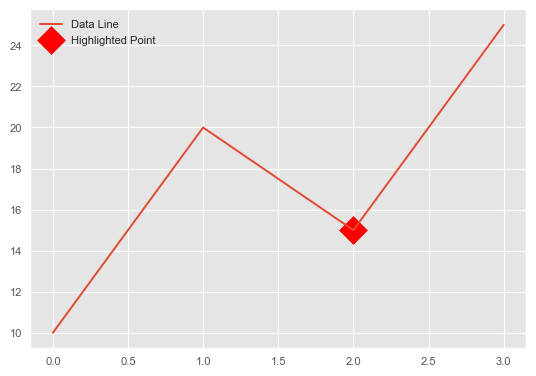

In [262]:
import matplotlib.pyplot as plt

# Sample data
x = [0, 1, 2, 3]
y = [10, 20, 15, 25]

fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-', label="Data Line")

# Specific point to highlight
point_x, point_y = 2, 15

# Add only the diamond symbol at the point and include it in the legend
ax.scatter(point_x, point_y, marker='D', color='red', s=200, label="Highlighted Point")

ax.legend()
plt.show()


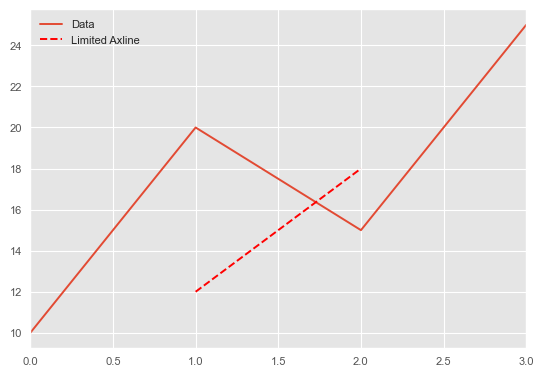

In [231]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Example data
ax.plot([0, 1, 2, 3], [10, 20, 15, 25], label="Data")

# Limiting ax.axline by plotting a segment instead
x_start, x_end = 1, 2  # Define limits
y_start, y_end = 12, 18  # Corresponding y-values

ax.plot([x_start, x_end], [y_start, y_end], linestyle='--', color='red', label="Limited Axline")

ax.set_xlim(0, 3)  # Ensure the axis is set within range
ax.legend()
plt.show()

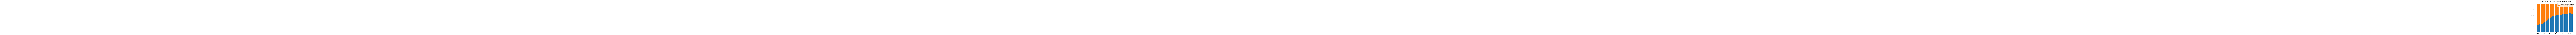

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.DataFrame({
#     'Category': ['A', 'B', 'C'],
#     'Group 1': [30, 40, 30],
#     'Group 2': [20, 30, 50],
#     'Group 3': [50, 30, 20]
# })

# # Convert to percentage
# df.set_index('Category', inplace=True)
# df_percentage = df.div(df.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots()
bottom_values = np.zeros(len(china_usa_worldstackedBarchart))

for group in china_usa_worldstackedBarchart.columns:
    bars = ax.bar(china_usa_worldstackedBarchart.index, china_usa_worldstackedBarchart[group], bottom=bottom_values, label=group)
    bottom_values += china_usa_worldstackedBarchart[group].values

    # Add percentage labels
    for i, value in enumerate(china_usa_worldstackedBarchart[group]):
        ax.text(i, bottom_values[i] - value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color='white')

ax.set_ylabel('Percentage')
ax.set_title('100% Stacked Bar Chart with Percentage Labels')
ax.legend()
plt.show()

In [161]:
china_to_usa_exports['pct_change'] = china_to_usa_exports["china_to_usa_exports"].pct_change()

In [162]:
china_to_usa_exports

,year,china_to_usa_exports,usa_to_china_exports,pct_change
0,1995,"45,690,769,920.00000000000000000000","14,951,717,225.00000000000000000000",NaN
1,1996,"50,649,990,419.00000000000000000000","15,146,796,608.00000000000000000000",0.10853878163320729300
2,1997,"60,586,976,676.00000000000000000000","15,175,417,764.00000000000000000000",0.19618930181026073001
3,1998,"67,737,543,295.00000000000000000000","15,572,936,219.00000000000000000000",0.11802151239925651183
4,1999,"80,818,471,036.00000000000000000000","17,292,787,964.00000000000000000000",0.19311193032247975232
5,2000,"93,687,292,841.00000000000000000000","21,131,678,390.00000000000000000000",0.15923119603769397834
6,2001,"96,519,787,609.00000000000000000000","24,782,281,363.00000000000000000000",0.03023349999884317185
7,2002,"125,700,404,368.00000000000000000000","26,600,345,924.00000000000000000000",0.30232781776530814888
8,2003,"152,016,329,237.00000000000000000000","33,362,532,752.00000000000000000000",0.20935433741292985843
9,2004,"192,194,851,697.00000000000000000000","42,500,667,614.00000000000000000000",0.26430399064142617860


In [ ]:
trump_first_term = china_to_usa_exports.iloc[23:27]

In [175]:
china_to_usa_exports["china_to_usa_exports"].loc[23:27]

23   547,225,284,926.00000000000000000000
24   456,118,767,508.00000000000000000000
25   447,435,087,134.00000000000000000000
26   529,752,656,782.00000000000000000000
27   562,996,373,713.00000000000000000000
Name: china_to_usa_exports, dtype: float64

In [167]:
trump_first_term["pct_change"].sum()

np.float64(0.07091317562965815)

In [1]:
(160574161104.0 - 137097152806.0) / 160574161104.0

0.14620663833201974

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Create a Styler object with some formatting
styler = df.style.background_gradient(cmap='viridis')

# Render the Styler object to a Matplotlib figure
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figure size as needed
ax.axis('off')  # Turn off the axis

# Insert the Styler into the figure
img = styler.to_html()
ax.text(0.5, 0.5, img, ha='center', va='center', fontsize=10, wrap=True)

plt.show()


In [97]:
usa_to_china_exports.style.background_gradient(cmap="viridis", subset="usa_to_china_exports").format("${:,.2f}", subset="usa_to_china_exports")


,year,usa_to_china_exports
0,1995,"$14,951,717,225.00"
1,1996,"$15,146,796,608.00"
2,1997,"$15,175,417,764.00"
3,1998,"$15,572,936,219.00"
4,1999,"$17,292,787,964.00"
5,2000,"$21,131,678,390.00"
6,2001,"$24,782,281,363.00"
7,2002,"$26,600,345,924.00"
8,2003,"$33,362,532,752.00"
9,2004,"$42,500,667,614.00"


In [48]:
china_to_usa_exports_pivot

,value
year,
1995,"45,690,769,920.00000000000000000000"
1996,"50,649,990,419.00000000000000000000"
1997,"60,586,976,676.00000000000000000000"
1998,"67,737,543,295.00000000000000000000"
1999,"80,818,471,036.00000000000000000000"
2000,"93,687,292,841.00000000000000000000"
2001,"96,519,787,609.00000000000000000000"
2002,"125,700,404,368.00000000000000000000"
2003,"152,016,329,237.00000000000000000000"


In [47]:
pd.set_option('display.float_format', '{:,.20f}'.format)


In [22]:
total_world_exports

,year,total_world_exports
0,1995,5064428174731.0000000000
1,1996,5366727699264.0000000000
2,1997,5597860603133.0000000000
3,1998,5553340385212.0000000000
4,1999,5749299545206.0000000000
5,2000,6503191115058.0000000000
6,2001,6310722986700.0000000000
7,2002,6618312168241.0000000000
8,2003,7657279655976.0000000000
9,2004,9237959123127.0000000000


Data Prep

In [ ]:
# China
china = (imf_trade_data[(imf_trade_data["COUNTRY"]
 .isin(["China, People's Republic of"]) & (imf_trade_data["INDICATOR"] == "Exports of goods"))]
 .pivot_table(index = ["TIME_PERIOD"], values = "OBS_VALUE", aggfunc="sum")
 )

# USA
usa = (imf_trade_data[(imf_trade_data["COUNTRY"] == "United States") & (imf_trade_data["INDICATOR"] == "Exports of goods")]
 .pivot_table(index = "TIME_PERIOD", values = "OBS_VALUE", aggfunc="sum")
 )

# Rest of the World
rest_of_the_world = (imf_trade_data[(imf_trade_data["COUNTRY"] != "China, People's Republic of") &
                                    (imf_trade_data["COUNTRY"] != "United States")] 
                                    .query('INDICATOR == "Exports of goods"')
                                    .pivot_table(index = ["COUNTRY"], values = "OBS_VALUE", aggfunc="sum")
                                    .nlargest(columns="OBS_VALUE", n=5)
)



### China USA 

In [ ]:
oec_exports = pd.read_csv("trade_i_baci_a_22.csv")

In [ ]:
oec_exports.head()

,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name
0,2022,usa,United States,chl,Chile,660320,Umbrella frames,6,873.0,0.018,mt,Metric Tonne
1,2022,usa,United States,chl,Chile,660390,"Parts & trimmings, of umbrella, walking sticks...",6,10262.0,0.372,mt,Metric Tonne
2,2022,usa,United States,chl,Chile,670100,"Bird skins and feathers, articles therefrom",6,1290.0,0.028,mt,Metric Tonne
3,2022,usa,United States,chl,Chile,670210,"Artificial flowers foliage fruit, articles, pl...",6,34788.0,3.322,mt,Metric Tonne
4,2022,usa,United States,chl,Chile,670290,Artificial flowers foliage fruit etc except pl...,6,23916.0,0.585,mt,Metric Tonne


In [ ]:
top10_exports_china_usa = (oec_exports[(oec_exports["exporter_name"] == "China") & 
             (oec_exports["importer_name"] == "United States")]
             .pivot_table(index = "product_name", values = "value", aggfunc = "sum")
             .nlargest(columns="value", n = 10)
             .sort_values(by = "value", ascending=False)#[["value"]]
             #.sum()
             # .plot(kind = "barh")
             # .style
             # .format("{:,.0f}")
 
 )

top10_exports_usa_china = (oec_exports[(oec_exports["exporter_name"] == "United States") & 
             (oec_exports["importer_name"] == "China")] 
             .pivot_table(index = "product_name", values = "value", aggfunc = "sum")
             .nlargest(columns="value", n = 10)
             .sort_values(by = "value", ascending=False)#[["value"]]
             #.sum()
             # .plot(kind = "barh")
             # .style
             # .format("{:,.0f}")
 
 )

In [ ]:
top10_exports_china_usa

,value
product_name,
Smartphones,9.235228e+10
Portable Computers under 10kg with Keyboard & Display,8.428446e+10
"Other toys (wheeled, model scale, puzzles)",2.893652e+10
Lithium-Ion Batteries,2.280944e+10
Video Game Consoles & Machines,1.873726e+10
Voice & Data Communication Machines,1.804272e+10
Parts & Accessories for Data Processing Equipment (n.e.),1.254294e+10
"Computer Monitors (Non-Cathode-Ray-Tube, Direct-Connect)",1.107156e+10
Other Plastic Articles,9.879753e+09


In [ ]:
top10_exports_usa_china

,value
product_name,
"Soya Beans (Excl. Seed, Broken or Not)",3.319601e+10
Crude Petroleum Oils,1.946032e+10
"Propane, liquefied",1.468035e+10
Processor-Controller Integrated Circuits,9.774182e+09
Medium Sized Cars,8.667555e+09
Semiconductor Manufacturing Equipment,7.275500e+09
Maize except seed corn,7.034769e+09
Medicaments in Dosage (n.e.s.),5.862211e+09
"Fixed-Wing Aircraft (>15,000 kg Unladen Weight)",5.236313e+09


In [ ]:
oec_exports.head()

,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name
0,2022,usa,United States,chl,Chile,660320,Umbrella frames,6,873.0,0.018,mt,Metric Tonne
1,2022,usa,United States,chl,Chile,660390,"Parts & trimmings, of umbrella, walking sticks...",6,10262.0,0.372,mt,Metric Tonne
2,2022,usa,United States,chl,Chile,670100,"Bird skins and feathers, articles therefrom",6,1290.0,0.028,mt,Metric Tonne
3,2022,usa,United States,chl,Chile,670210,"Artificial flowers foliage fruit, articles, pl...",6,34788.0,3.322,mt,Metric Tonne
4,2022,usa,United States,chl,Chile,670290,Artificial flowers foliage fruit etc except pl...,6,23916.0,0.585,mt,Metric Tonne


In [ ]:
oec_exports["hscode"] = oec_exports["hs_code"].astype("object")

In [ ]:
oec_exports.pivot_table(index = "product_name", values = "value", aggfunc="sum").nlargest(columns = "value", n = 50)

,value
product_name,
Crude Petroleum Oils,2.856505e+12
Bituminous Petroleum Distillates (Excl. Crude),2.070810e+12
Unwrought Non-Monetary Gold,8.061767e+11
Processor-Controller Integrated Circuits,7.862402e+11
Medicaments in Dosage (n.e.s.),7.480773e+11
Other Integrated Circuits (n.e.c.),6.343637e+11
Gaseous Natural Gas,6.309030e+11
Smartphones,6.083943e+11
Liquefied Natural Gas,5.626618e+11


In [ ]:
import pandas as pd

usa_china = pd.read_csv("usa_china_exports_2005_2025.csv")
china_usa = pd.read_csv("china_usa_exports_2005_2025.csv")

In [ ]:
china_usa = (china_usa.assign(pct_change = china_usa["OBS_VALUE"].pct_change(),
                  )
#  .style
#  .format("{:,.2f}%", subset="pct_change")
#  .background_gradient(subset=["OBS_VALUE", "pct_change"])
#  #.bar(subset="pct_change")
 )

In [ ]:
usa_china = (usa_china.assign(pct_change = usa_china["OBS_VALUE"].pct_change(),
                  )
#  .style
#  .format("{:,.2f}%", subset="pct_change")
#  .background_gradient(subset=["OBS_VALUE", "pct_change"])
#  #.bar(subset="pct_change")
#  
)

In [ ]:
china_usa["USA Exports to China (% Change)"] = usa_china["pct_change"]
china_usa["China Exports to USA (% Change)"] = china_usa["pct_change"]

In [ ]:
china_usa = china_usa.rename(columns={"China Exports to USA ($)": "China to USA ($)",
                                      "USA Exports to China (% Change)": "USA to China Y-O-Y (%)",
                                      "China Exports to USA (% Change)": "China to USA Y-O-Y (%)"})

#china_usa["USA to China ($)"] = usa_china["OBS_VALUE"]

In [ ]:
china_usa = china_usa.drop(columns=["USA Exports to China ($)", "COUNTRY"])
china_usa["China to USA Y-O-Y ($)"] = china_usa["China to USA ($)"].diff()
china_usa["USA to China Y-O-Y ($)"] = china_usa["USA to China ($)"].diff()



KeyError: "['USA Exports to China ($)'] not found in axis"

In [ ]:
china_usa

,COUNTRY,INDICATOR,COUNTERPART_COUNTRY,FREQUENCY,TIME_PERIOD,OBS_VALUE,pct_change,USA to China Y-O-Y (%),China to USA Y-O-Y (%)
0,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2005,163348333000,NaN,NaN,NaN
1,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2006,203897937000,0.248240,0.319989,0.248240
2,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2007,233180641000,0.143615,0.181341,0.143615
3,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2008,252786388000,0.084080,0.095321,0.084080
4,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2009,221384347000,-0.124224,-0.026324,-0.124224
5,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2010,283678834831,0.281386,0.320546,0.281386
6,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2011,324856471640,0.145156,0.133255,0.145156
7,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2012,352539592641,0.085216,0.061420,0.085216
8,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2013,369006713466,0.046710,0.101383,0.046710
9,"China, People's Republic of","Exports of goods, Free on board (FOB), US dollar",United States,Annual,2014,397099314578,0.076130,0.016057,0.076130


In [ ]:
china_usa = china_usa.drop(columns=["pct_change", "% Change USA Exports to China", 
                                    "% Change China Exports to USA", "INDICATOR", "COUNTERPART_COUNTRY"])

KeyError: "['% Change USA Exports to China', '% Change China Exports to USA'] not found in axis"

In [ ]:
china_usa

,COUNTRY,TIME_PERIOD,OBS_VALUE,USA Exports to China (% Change),China Exports to USA (% Change)
0,"China, People's Republic of",2005,163348333000,NaN,NaN
1,"China, People's Republic of",2006,203897937000,0.319989,0.248240
2,"China, People's Republic of",2007,233180641000,0.181341,0.143615
3,"China, People's Republic of",2008,252786388000,0.095321,0.084080
4,"China, People's Republic of",2009,221384347000,-0.026324,-0.124224
5,"China, People's Republic of",2010,283678834831,0.320546,0.281386
6,"China, People's Republic of",2011,324856471640,0.133255,0.145156
7,"China, People's Republic of",2012,352539592641,0.061420,0.085216
8,"China, People's Republic of",2013,369006713466,0.101383,0.046710
9,"China, People's Republic of",2014,397099314578,0.016057,0.076130


In [ ]:
china_usa_top50_export_products = oec_exports[(oec_exports["exporter_name"] == "China") & (oec_exports["importer_name"] == "United States")]


In [ ]:
china_usa_top50_export_products = china_usa_top50_export_products.pivot_table(index = "product_name", values = "value", aggfunc = "sum").nlargest(columns="value", n= 50)

In [ ]:
china_usa_top10_export_products = china_usa_top50_export_products.pivot_table(index = "product_name", values = "value", aggfunc = "sum").nlargest(columns="value", n= 10)

In [ ]:
import seaborn as sns

In [ ]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ramon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import squarify

In [ ]:
labels_top10 = china_usa_top10_export_products.index.tolist()

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

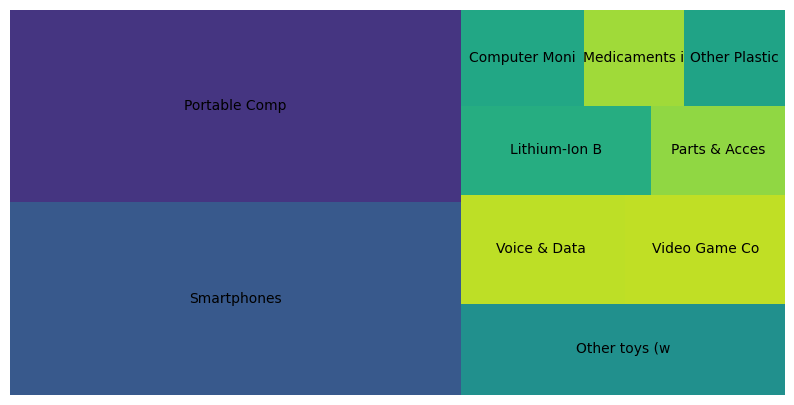

In [ ]:
#labels = labels
fig, ax = plt.subplots(figsize=(10,5))
label= top10_exports_china_usa.index.tolist()
label = [name[:13]  if len(name) > 10 else name for name in label]
squarify.plot(sizes = top10_exports_china_usa["value"], label = label)


plt.axis("off")
#plt.legend(label, loc = (1,0.44))

<Axes: >

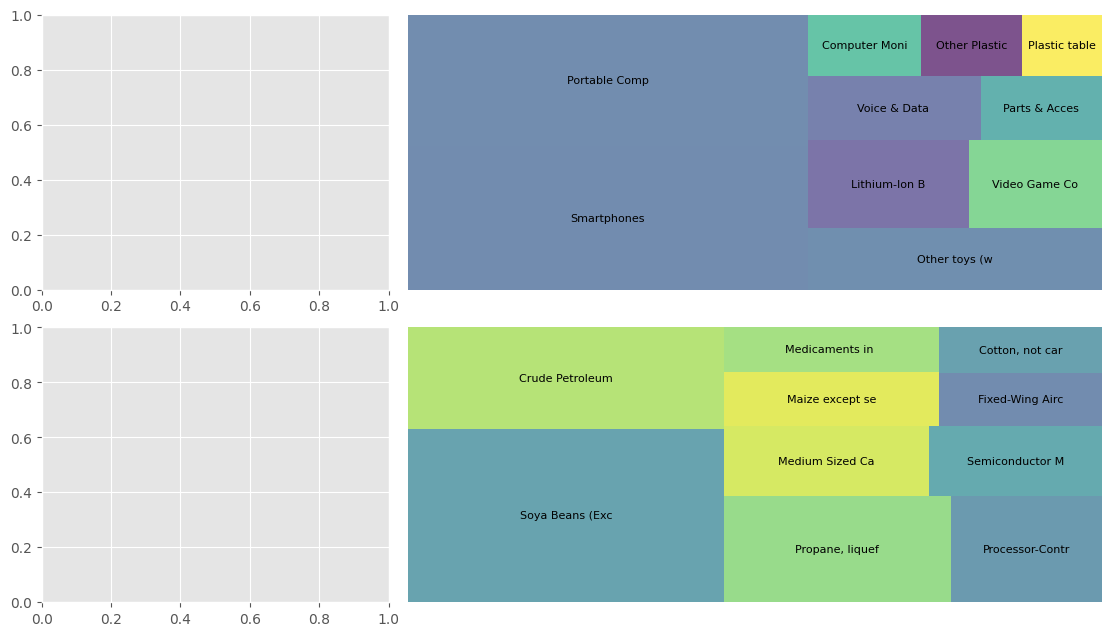

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout = "constrained", figsize = (11,9))

gs = GridSpec(3,3, figure = fig)

plt.style.use("ggplot")

ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=1))

ax2 = plt.subplot(gs.new_subplotspec((0,1), colspan = 2))
plt.axis("off");

ax3 = plt.subplot(gs.new_subplotspec((1,0), colspan = 1))

ax4 = plt.subplot(gs.new_subplotspec((1,1), colspan=2))
plt.axis("off");

# Treemap China USA
label= top10_exports_china_usa.index.tolist()
label = [name[:13]  if len(name) > 10 else name for name in label]
squarify.plot(sizes = top10_exports_china_usa["value"], label = label, ax = ax2, alpha=0.7, text_kwargs={"fontsize": 8})

# Treemap USA China
label= top10_exports_usa_china.index.tolist()
label = [name[:15]  if len(name) > 12 else name for name in label]
squarify.plot(sizes = top10_exports_usa_china["value"], label = label, ax = ax4, alpha=0.7, text_kwargs={"fontsize": 8})

 

# # Line Plot
# ax1.plot(china_usa["TIME_PERIOD"],
#         china_usa["China to USA ($)"], label = "China")

# ax1.plot(china_usa["TIME_PERIOD"],
#         china_usa["USA to China ($)"], label = "USA")
# #ax1.axis("off");
# ax1.legend()

# # Barplot China
# ax3.bar(china_usa["TIME_PERIOD"],
#        china_usa["China to USA Y-O-Y (%)"], label = "CHINA_USA")


# # Barplot USA

# ax4.bar(china_usa["TIME_PERIOD"],
#         china_usa["USA to China Y-O-Y (%)"], label = "USA")

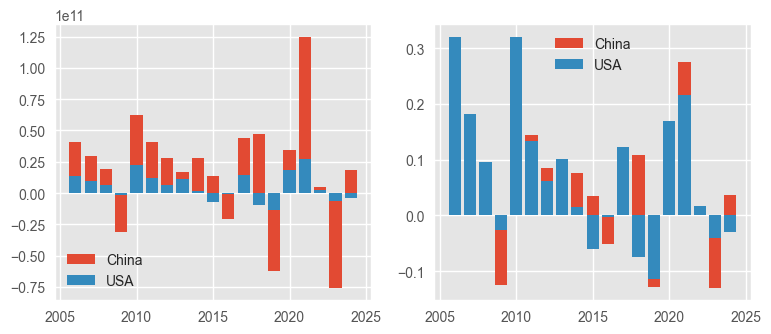

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))
plt.style.use("ggplot")
ax[0].bar(china_usa["TIME_PERIOD"],
       china_usa["China to USA Y-O-Y ($)"], label = "China")
ax[0].bar(china_usa["TIME_PERIOD"],
       china_usa["USA to China Y-O-Y ($)"], label = "USA")

ax[0].legend()

ax[1].bar(china_usa["TIME_PERIOD"],
       china_usa["China to USA Y-O-Y (%)"], label = "China")
ax[1].bar(china_usa["TIME_PERIOD"],
       china_usa["USA to China Y-O-Y (%)"], label = "USA")

ax[1].legend()


In [ ]:
china_usa_top10_export_products

,value
product_name,
Smartphones,9.235228e+10
Portable Computers under 10kg with Keyboard & Display,8.428446e+10
"Other toys (wheeled, model scale, puzzles)",2.893652e+10
Lithium-Ion Batteries,2.280944e+10
Video Game Consoles & Machines,1.873726e+10
Voice & Data Communication Machines,1.804272e+10
Parts & Accessories for Data Processing Equipment (n.e.),1.254294e+10
"Computer Monitors (Non-Cathode-Ray-Tube, Direct-Connect)",1.107156e+10
Other Plastic Articles,9.879753e+09


In [1]:
import pandas as pd

In [2]:
usa_china_rest_of_world = pd.read_csv("usa_china_rest_of_world_data.csv")

In [10]:
usa_china_rest_of_world.head()

,COUNTRY,INDICATOR,COUNTERPART_COUNTRY,FREQUENCY,TIME_PERIOD,OBS_VALUE
0,United States,"Exports of goods, Free on board (FOB), US dollar",Trinidad and Tobago,Monthly,2005-M01,85600000.0
1,United States,"Exports of goods, Free on board (FOB), US dollar",Trinidad and Tobago,Monthly,2005-M02,85800000.0
2,United States,"Exports of goods, Free on board (FOB), US dollar",Trinidad and Tobago,Monthly,2005-M03,104800000.0
3,United States,"Exports of goods, Free on board (FOB), US dollar",Trinidad and Tobago,Monthly,2005-M04,117700000.0
4,United States,"Exports of goods, Free on board (FOB), US dollar",Trinidad and Tobago,Monthly,2005-M05,145100000.0


In [ ]:
usa_china

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115419 entries, 0 to 115418
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   COUNTRY              115419 non-null  object 
 1   INDICATOR            115419 non-null  object 
 2   COUNTERPART_COUNTRY  115419 non-null  object 
 3   FREQUENCY            115419 non-null  object 
 4   TIME_PERIOD          115415 non-null  object 
 5   OBS_VALUE            115415 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
labels_top10

['Smartphones',
 'Portable Computers under 10kg with Keyboard & Display',
 'Other toys (wheeled, model scale, puzzles)',
 'Lithium-Ion Batteries',
 'Video Game Consoles & Machines',
 'Voice & Data Communication Machines',
 'Parts & Accessories for Data Processing Equipment (n.e.)',
 'Computer Monitors (Non-Cathode-Ray-Tube, Direct-Connect)',
 'Other Plastic Articles',
 'Plastic table and kitchen ware']

In [ ]:
import pandas as pd
imf_trade_dataset = pd.read_csv("imf_trade_dataset.csv")

In [ ]:
imf_trade_dataset["TIME_PERIOD"].unique()

array([2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023., 2024.,
         nan])

### IMF API

In [1]:
pip install sdmx1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ramon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import sdmx
print(dir(sdmx))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'compact', 'compact_data_message_reader', 'dataset', 'dsd', 'dsd_reader', 'generic', 'generic_data_message_reader', 'iteration', 'xmlcommon']


AttributeError: module 'sdmx' has no attribute 'package'

In [6]:
import sdmx

IMF_DATA = sdmx.client('IMF_DATA')

structure = IMF_DATA.datastructure('NGDPD')

data_msg = IMF_DATA.data("WEO", key = "NGDPD", params={'startPeriod': 2018}, dsd_reader = structure)

real_gdp_growth = sdmx.to_pandas(data_msg)

AttributeError: module 'sdmx' has no attribute 'client'

In [ ]:
import sdmx

IMF_DATA = Request('IMF')

structure = IMF_DATA.datastructure('NGDPD')

data_msg = IMF_DATA.data("WEO", key = "NGDPD", params={'startPeriod': 2018}, dsd_reader = structure)

real_gdp_growth = sdmx.to_pandas(data_msg)

ImportError: cannot import name 'Request' from 'sdmx' (C:\Users\ramon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sdmx\__init__.py)

In [ ]:
real_gdp_growth.head()

""


In [ ]:
IMF_DATA = sdmx.Client('IMF_DATA')

print(IMF_DATA)


# flows = IMF_DATA.dataflows()
# print(flows)  # Lists available datasets

AttributeError: module 'sdmx' has no attribute 'Client'

In [ ]:
flows = IMF_DATA.dataflow()
print(flows)

<sdmx.StructureMessage>
  <Header>
    id: 'IDREF6980'
    prepared: '2025-05-23T23:01:56.752877+00:00'
    sender: <Agency unknown>
    source: 
    test: False
  response: <Response [200]>
  DataflowDefinition (38): AFRREO IRFCL HPD PI BOP_AGG ICSD LS MCDREO A...
  DataStructureDefinition (35): DSD_AFRREO DSD_IRFCL_PUB DSD_HPD DSD_IP...


In [ ]:
cpi_df.head().T

COUNTRY  INDEX_TYPE  COICOP_1999  TYPE_OF_TRANSFORMATION  FREQUENCY  COMMON_REFERENCE_PERIOD  OVERLAP  SCALE  ACCESS_SHARING_LEVEL  SECURITY_CLASSIFICATION  TIME_PERIOD
CAN      CPI         CP01         IX                      M          2002A                    OL       0      PUBLIC_OPEN           PUB                      2018-M01       142.6
                                                                                                                                                             2018-M02       142.3
                                                                                                                                                             2018-M03       141.3
                                                                                                                                                             2018-M04       141.9
                                                                                                                       

In [ ]:

# import libraries

import  sdmx

from msal import PublicClientApplication

 

# parameter values for authorization and data requests

client_id = '446ce2fa-88b1-436c-b8e6-94491ca4f6fb'

authority = 'https://imfprdb2c.b2clogin.com/imfprdb2c.onmicrosoft.com/b2c_1a_signin_aad_simple_user_journey/'

scope = 'https://imfprdb2c.onmicrosoft.com/4042e178-3e2f-4ff9-ac38-1276c901c13d/iData.Login'

# authorize and retrieve access token

app = PublicClientApplication(client_id,authority=authority)

token = None

token = app.acquire_token_interactive(scopes=[scope])

# define header for a request

header = {'Authorization': f"{token['token_type']} {token['access_token']}"}

 

# retrieve data

IMF_DATA = sdmx.Client('IMF_DATA')

data_msg = IMF_DATA.data('CPI', key='USA+CAN.CPI.CP01.IX.M', params={'startPeriod': 2018}, headers=header)

 

# convert to pandas

cpi_df = sdmx.to_pandas(data_msg)

print(cpi_df.head())

AttributeError: module 'sdmx' has no attribute 'Client'

### Product level analysis